Customizing Widgets with Fiat Attributes
========================================

Introduction
------------

Fiat attributes allow you to customize various aspects of the GUI for function nodes, dataclasses, and pydantic models. They provide a powerful way to modify the appearance and behavior of function parameters and outputs, adjust the GUI for dataclasses, control how function nodes run (e.g., asynchronously or manually), set labels and tooltips for function nodes and parameters, and validate function parameters and dataclass fields.


There are two main ways to add attributes to a function:
* using a decorator: `@fl.with_fiat_attributes` on top of the function definition
* using the `fl.add_fiat_attributes` function elsewhere in the code

> For more details on customizing dataclasses and pydantic models, see the GUI Registry [documentation](manual_registry_source).


Why Customize Widgets?
----------------------

As an example, let's consider the function "my_asin" below: if you run this function with `run()`,
the GUI will allow the user to enter any float value for x.
This lets the user enter values that may not be valid for the function.

2024-07-05 00:30:13.792 Python[93667:11739238] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/w1/w77kvvl9613022ksfxj7v8xh0000gn/T/org.python.python.savedState


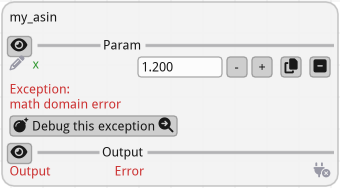

In [1]:
import fiatlight as fl

# Ideally, we would like to restrict the range of x to [-1, 1]
def my_asin(x: float = 0.5) -> float:
   import math
   return math.asin(x)

fl.run(my_asin, app_name="No range restriction")

Adding Attributes with a Decorator
----------------------------------

It is possible to customize the GUI for parameters using function attributes:
below, we set the range for x. As a consequence it will be displayed with a slider widget
with a range from -1 to 1.

2024-07-05 00:30:20.573 Python[93667:11739238] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


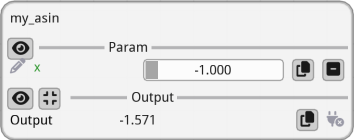

In [2]:
import fiatlight as fl

# Use the `with_fiat_attributes` decorator to set custom fiat attributes for the function:
# Here, we set the range of the x parameter.
# Important: note the double underscore ("_") after the parameter name!
@fl.with_fiat_attributes(x__range=(-1, 1))
def my_asin(x: float = 0.5) -> float:
    import math
    return math.asin(x)


fl.run(my_asin, app_name="Range restriction")

Adding Attributes Manually
--------------------------

If you do not wish or cannot modify the function definition, you can use the `add_fiat_attributes` function to add attributes to the function.
This way, your function stays unmodified, and you can specify the attributes only when creating its GUI.

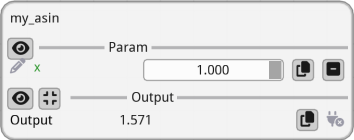

In [3]:
import fiatlight as fl

def my_asin(x: float = 0.5) -> float:
    import math
    return math.asin(x)

# Important: note the double underscore ("_") after the parameter name!
fl.add_fiat_attributes(my_asin, x__range=(-1, 1))
fl.run(my_asin, app_name="Range restriction")

Listing Available Fiat Attributes
----------------------------------

To customize the GUI for function parameters or outputs, you can list the available fiat attributes for a specific type using the Fiatlight command line utility.

Use the command fiatlight gui int in a terminal (or console) to list available fiat attributes for the int type. For other types, replace int with the type you are interested in.

For more information, see "[Fiatlight command line utility](manual_cli)".

Below is an extract of the output of `fiatlight gui int`:

    GUI type: int
    ==============
    A highly customizable int widget.
    Available fiat attributes for IntWithGui:
    +--------------------+-----------------+-----------+-------------------------------------------+
    | Name               | Type            | Default   | Explanation                               |
    +====================+=================+===========+===========================================+
    | range              | tuple[int, int] | (0, 10)   | Range of the integer                      |
    +--------------------+-----------------+-----------+-------------------------------------------+
    | edit_type          | str             | input     | Type of the edit widget. Possible values: |
    |                    |                 |           | slider, input, drag, knob,                |
    |                    |                 |           | slider_and_minus_plus                     |
    +--------------------+-----------------+-----------+-------------------------------------------+
    | format             | str             | %d        | Format string for the value               |
    +--------------------+-----------------+-----------+-------------------------------------------+
    | ...                | ...             |           |                                           |

    Available fiat attributes for AnyDataWithGui Generic attributes:
    --------------------------------------------------------------------------------
    +-------------+--------+---------------------+------------------------------------------------+
    | Name        | Type   | Default             | Explanation                                    |
    +=============+========+=====================+================================================+
    | label       | str    |                     | A label for the parameter. If empty, the       |
    |             |        |                     | function parameter name is used                |
    +-------------+--------+---------------------+------------------------------------------------+
    | validator   | object | None                | Function to validate a parameter value: should |
    |             |        |                     | raise a ValueError if invalid, or return the   |
    |             |        |                     | value (possibly modified)                      |
    +-------------+--------+---------------------+------------------------------------------------+
    | ...         | ...    |                     |                                                |


Example: Fiat Attributes in Action
------------------------------------

In the example below, we customize the GUI for the function `interactive_histogram` by setting fiat attributes for the number of data points, the number of bars, the mean, and the standard deviation.

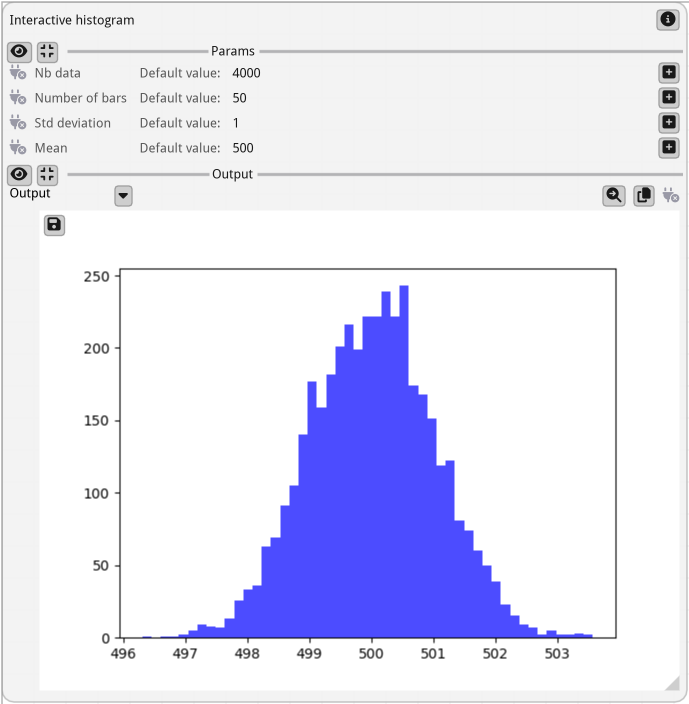

In [4]:
import fiatlight
from matplotlib.figure import Figure

@fiatlight.with_fiat_attributes(
    # Label displayed as the title of the function node
    label="Interactive histogram",

    # Edit the number of data points with a logarithmic slider
    # Note: by default, you can ctrl+click on a slider to input a value directly,
    #       this is disabled here with nb_data__slider_no_input
    nb_data__label="Nb data",
    nb_data__edit_type="slider",
    nb_data__range=(100, 1_000_000),
    nb_data__slider_logarithmic=True,
    nb_data__slider_no_input=True,

    # Edit the number of bars with a knob
    n_bars__label="Number of bars",
    n_bars__edit_type="drag",
    n_bars__range=(1, 300),

    # Edit the average with a slider for a float value with any range
    # (the slider range will adapt interactively, when dragging far to the left or to the right)
    average__label="Mean",
    average__edit_type="slider_float_any_range",
    average__range=(-5, 5),

    # Edit the standard deviation with a drag
    sigma__label="Std deviation",
    sigma__edit_type="knob",
    sigma__range=(0.1, 5),

)
def interactive_histogram(
    nb_data: int = 4000, n_bars: int = 50, sigma: float = 1, average: float = 500
) -> Figure:
    '''Generate an interactive histogram with adjustable number of bars, mean, and standard deviation.'''
    import numpy as np
    import matplotlib.pyplot as plt

    data = np.random.normal(loc=average, scale=sigma, size=nb_data)
    bins = np.linspace(np.min(data), np.max(data), n_bars)
    fig, ax = plt.subplots()
    ax.hist(data, bins=bins, color="blue", alpha=0.7)
    return fig

fiatlight.run(interactive_histogram, app_name="Fiat attributes")